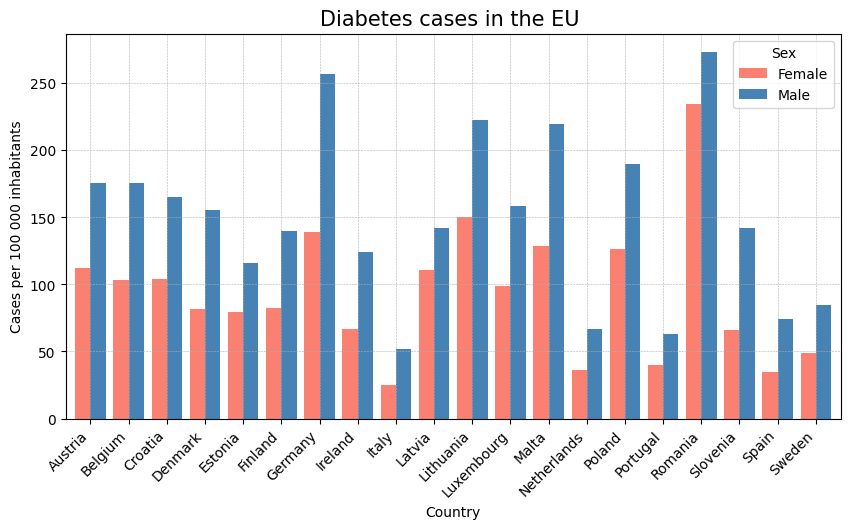

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_diabetes_cases(dataset: str,
                        year_from: int,
                        year_to: int,
                        plot_title: str,
                        x_label: str,
                        y_label: str) -> None:
    """
    Generates a bar plot describing the amount of diabetes cases in a 
    specified time interval using mean values. 
    For a descriptive representation recommended to use for short time intervals.

    Required parameters:
    --------------------
            dataset (str): The filepath of the used dataset.
            year_from (int): The starting year of the time interval. 
            year_to (int): The ending year of the time interval.
            plot_title (str): The title of the plot.
            x_label (str): The name of the y-label of the plot.
            y_label (str): The name of the y-label of the plot.

    Returns:
    --------
            None: The generated bar plot.
    """

    #Dataset preprocessing
    quality = pd.read_csv(dataset)
    quality = quality.drop(['Observation value'], axis = 1)
    quality = quality.rename(columns = {'Reference area': 'Country',
                                        'TIME_PERIOD': 'Year',
                                        'OBS_VALUE': 'Observation value'}) 
    
    diabetes_cases = quality.loc[quality['Measure'] == 'Diabetes hospital admission']
    diabetes_cases = diabetes_cases.loc[quality['Unit of measure'] == 'Per 100 000 inhabitants']
    diabetes_cases = diabetes_cases.loc[diabetes_cases['Sex'] != 'Total']
    diabetes_cases = diabetes_cases.loc[diabetes_cases['Year'] >= year_from]
    diabetes_cases = diabetes_cases.loc[diabetes_cases['Year'] <= year_to]
    
    #Filter out countries of the European Union
    EU = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
          'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 
          'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 
          'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
    diabetes_cases = diabetes_cases.loc[quality['Country'].isin(EU)]

    
    diabetes_plot_data = diabetes_cases.groupby(['Country','Sex'])['Observation value'].mean().unstack()

    #Generate the bar plot
    diabetes_plot_data.plot(kind = 'bar',  
                           align = 'center', 
                           color = ['salmon','steelblue'], 
                           width  = 0.8,
                           figsize = (10,5))
    plt.title(plot_title, 
              fontsize = 15)
    plt.ylabel(y_label, 
               fontsize = 10)
    plt.xlabel(x_label, 
               fontsize = 10)
    plt.xticks(rotation = 45, 
               ha='right')
    plt.legend(title = 'Sex')
    plt.grid(linestyle = '--', 
             linewidth = 0.4)
    plt.show()

#Call the function
plot_diabetes_cases(r"C:\Users\Dana\OneDrive\Desktop\assignment2\Healthcare_quality_and_outcomes.csv",
               2018,
               2022,
               'Diabetes cases in the EU ',
               'Country',
               'Cases per 100 000 inhabitants')


In [ ]:
"C:\Users\Dana\OneDrive\Desktop\assignment2\Food_supply_and_consumption.csv"